In [11]:
import os

train_dir      = os.path.join('data', 'train')
validation_dir = os.path.join('data', 'validation')

In [12]:
import tensorflow as tf

preprocess_input = tf.keras.applications.vgg16.preprocess_input

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

preprocess_input = tf.keras.applications.resnet50.preprocess_input 

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)#rescale=1./255)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)#rescale=1./255)

batch_size=20

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 400x400
        target_size=(100, 100),
        batch_size=batch_size,
        class_mode="categorical")

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(100, 100),
        batch_size=batch_size,
        class_mode="categorical")

Found 18424 images belonging to 10 classes.
Found 4000 images belonging to 10 classes.


In [14]:
from tensorflow.keras.applications import ResNet50 

conv_base = ResNet50(weights='imagenet',
                  include_top=False,
                 input_shape=(100, 100, 3))
conv_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 106, 106, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 50, 50, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 50, 50, 64)   256         ['conv1_conv[0][0]']      

 conv2_block3_2_conv (Conv2D)   (None, 25, 25, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 25, 25, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 25, 25, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_3_conv (Conv2D)   (None, 25, 25, 256)  16640       ['conv2_block3_2_relu[0][0]']    
                                                                                                  
 conv2_blo

 conv3_block3_2_conv (Conv2D)   (None, 13, 13, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 13, 13, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 13, 13, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_3_conv (Conv2D)   (None, 13, 13, 512)  66048       ['conv3_block3_2_relu[0][0]']    
                                                                                                  
 conv3_blo

 conv4_block2_2_conv (Conv2D)   (None, 7, 7, 256)    590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 7, 7, 256)   1024        ['conv4_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_2_relu (Activatio  (None, 7, 7, 256)   0           ['conv4_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_3_conv (Conv2D)   (None, 7, 7, 1024)   263168      ['conv4_block2_2_relu[0][0]']    
                                                                                                  
 conv4_blo

 conv4_block5_2_relu (Activatio  (None, 7, 7, 256)   0           ['conv4_block5_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_3_conv (Conv2D)   (None, 7, 7, 1024)   263168      ['conv4_block5_2_relu[0][0]']    
                                                                                                  
 conv4_block5_3_bn (BatchNormal  (None, 7, 7, 1024)  4096        ['conv4_block5_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_add (Add)         (None, 7, 7, 1024)   0           ['conv4_block4_out[0][0]',       
                                                                  'conv4_block5_3_bn[0][0]']      
          

 conv5_block2_2_relu (Activatio  (None, 4, 4, 512)   0           ['conv5_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 4, 4, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_3_bn (BatchNormal  (None, 4, 4, 2048)  8192        ['conv5_block2_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_add (Add)         (None, 4, 4, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_bn[0][0]']      
          

In [15]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_3 (Dense)             (None, 64)                2097216   
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,687,338
Trainable params: 25,634,218
Non-trainable params: 53,120
_________________________________________________________________


In [16]:
conv_base.trainable = False

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_3 (Dense)             (None, 64)                2097216   
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,687,338
Trainable params: 2,099,626
Non-trainable params: 23,587,712
_________________________________________________________________


In [17]:
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.Adam(),
              loss=losses.categorical_crossentropy,
              metrics=['accuracy'])

In [18]:
history = model.fit(
      train_generator,
      steps_per_epoch=18424//batch_size,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=4000//batch_size
      )

Epoch 1/10
921/921 [==============================] - 194s 209ms/step - loss: 0.8398 - accuracy: 0.7226 - val_loss: 0.3000 - val_accuracy: 0.9018
Epoch 2/10
921/921 [==============================] - 192s 208ms/step - loss: 0.2118 - accuracy: 0.9306 - val_loss: 0.1810 - val_accuracy: 0.9488
Epoch 3/10
921/921 [==============================] - 182s 197ms/step - loss: 0.1270 - accuracy: 0.9612 - val_loss: 0.3631 - val_accuracy: 0.8928
Epoch 4/10
921/921 [==============================] - 183s 199ms/step - loss: 0.0890 - accuracy: 0.9739 - val_loss: 0.1569 - val_accuracy: 0.9523
Epoch 5/10
921/921 [==============================] - 192s 208ms/step - loss: 0.0684 - accuracy: 0.9792 - val_loss: 0.1521 - val_accuracy: 0.9605
Epoch 6/10
921/921 [==============================] - 196s 213ms/step - loss: 0.0888 - accuracy: 0.9734 - val_loss: 0.1958 - val_accuracy: 0.9555
Epoch 7/10
921/921 [==============================] - 190s 206ms/step - loss: 0.0738 - accuracy: 0.9773 - val_loss: 0.1261 -

In [19]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

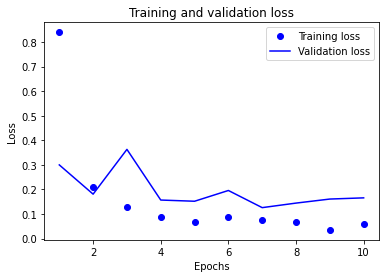

In [20]:
import matplotlib.pyplot as plt 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

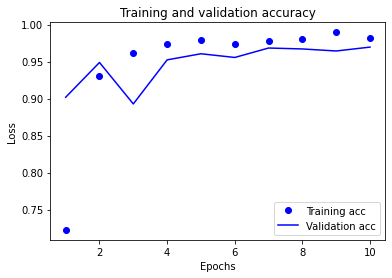

In [21]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [22]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'conv5_block3_3_conv':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [23]:
model.summary() 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_3 (Dense)             (None, 64)                2097216   
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,687,338
Trainable params: 3,154,346
Non-trainable params: 22,532,992
_________________________________________________________________


In [24]:
model.compile(optimizer=optimizers.Adam(),
              loss=losses.categorical_crossentropy,
              metrics=['accuracy'])

In [25]:
history = model.fit(
      train_generator,
      steps_per_epoch=18424//batch_size,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=4000//batch_size
      )

Epoch 1/10
921/921 [==============================] - 399s 431ms/step - loss: 0.1719 - accuracy: 0.9557 - val_loss: 0.1713 - val_accuracy: 0.9565
Epoch 2/10
921/921 [==============================] - 417s 453ms/step - loss: 0.0781 - accuracy: 0.9784 - val_loss: 0.1414 - val_accuracy: 0.9617
Epoch 3/10
921/921 [==============================] - 422s 458ms/step - loss: 0.0368 - accuracy: 0.9892 - val_loss: 0.0785 - val_accuracy: 0.9825
Epoch 4/10
921/921 [==============================] - 424s 460ms/step - loss: 0.0240 - accuracy: 0.9928 - val_loss: 0.1499 - val_accuracy: 0.9620
Epoch 5/10
921/921 [==============================] - 414s 450ms/step - loss: 0.0474 - accuracy: 0.9866 - val_loss: 0.2221 - val_accuracy: 0.9455
Epoch 6/10
921/921 [==============================] - 412s 448ms/step - loss: 0.0299 - accuracy: 0.9918 - val_loss: 0.1201 - val_accuracy: 0.9685
Epoch 7/10
921/921 [==============================] - 414s 449ms/step - loss: 0.0234 - accuracy: 0.9932 - val_loss: 0.1054 -

In [26]:
history_dict = history.history
history_dict.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

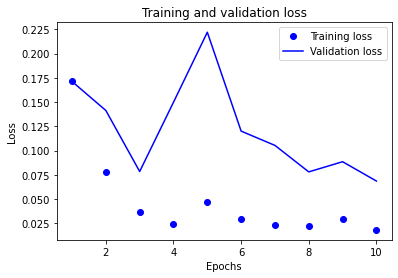

In [27]:
import matplotlib.pyplot as plt 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

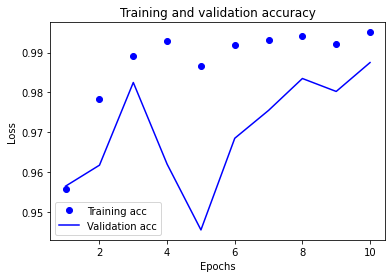

In [28]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [29]:
model.save('ResNet50TL.h5')